# **Product Listing Algorithm**

## **Name:** Harshal Janjani
## **Date:** 18/09/2023

# **EDA And Summary Statistics**

First few rows of the dataset:
   Government Uniqueness Score  Consumer Ratings  Overall Satisfaction  \
0                          4.2               3.5                   4.0   
1                          3.9               4.1                   4.2   
2                          4.5               4.2                   4.3   
3                          3.8               3.8                   3.9   
4                          4.1               4.5                   4.4   

   Ease of Use  Performance  Customer Support  Value for Money  \
0          4.3          4.1               3.8              4.2   
1          4.0          4.4               4.3              4.1   
2          4.2          4.5               4.4              4.5   
3          4.0          3.9               3.7              4.0   
4          4.3          4.4               4.2              4.3   

   Features and Functionality  Reliability  Likelihood to Recommend  \
0                         4.4          4.0              

<ipython-input-17-62640f047f12>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


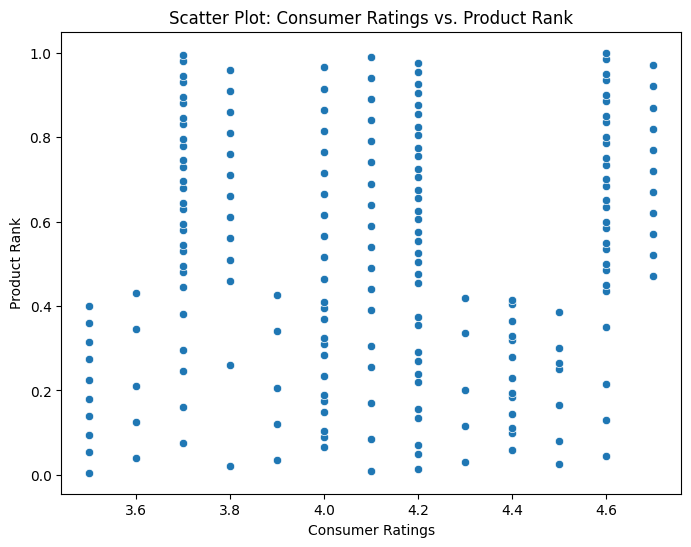

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 1400x800 with 0 Axes>

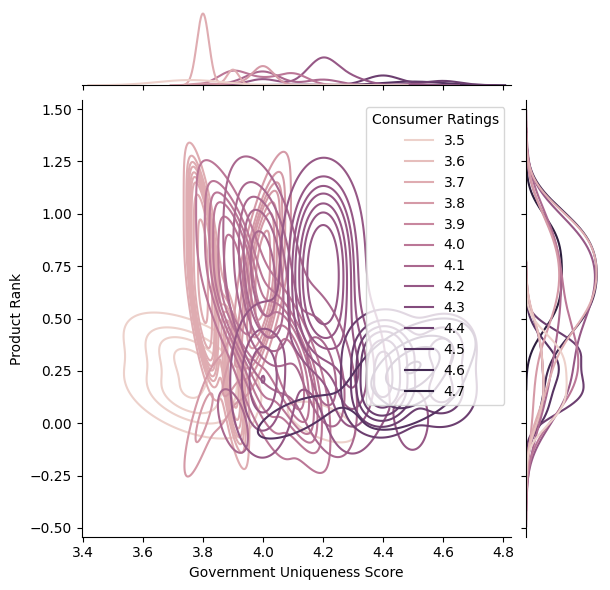

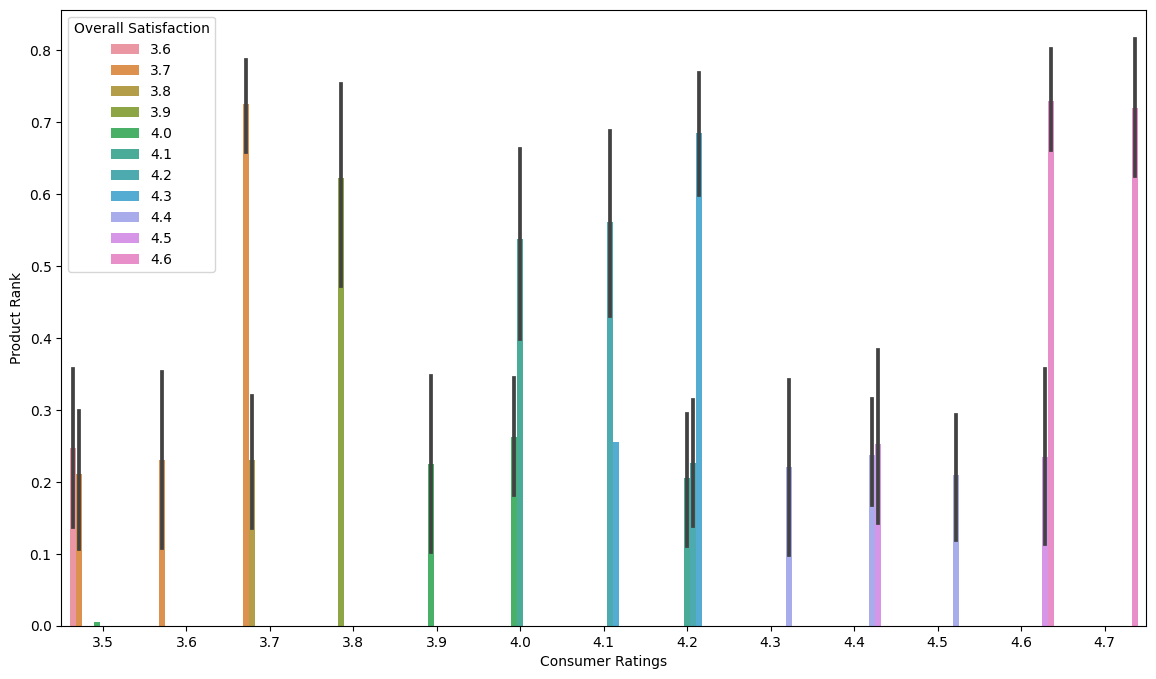

In [ ]:
import pandas as pd

data = pd.read_csv('dataset.csv')

print("First few rows of the dataset:")
print(data.head())

print("\nSummary statistics of numeric features:")
print(data.describe())

print("\nMissing values in the dataset:")
print(data.isnull().sum())

print("\nDistribution of Product Rank:")
print(data['Product Rank'].value_counts())

print("\nDistribution of Government Uniqueness Score:")
print(data['Government Uniqueness Score'].value_counts())

print("\nDistribution of Consumer Ratings:")
print(data['Consumer Ratings'].value_counts())

print("\nDistribution of Overall Satisfaction:")
print(data['Overall Satisfaction'].value_counts())

correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Consumer Ratings', y='Product Rank', data=data)
plt.title('Scatter Plot: Consumer Ratings vs. Product Rank')
plt.show()
print("\n\n")

plt.figure(figsize=(14, 8))
sns.jointplot(x='Government Uniqueness Score', y='Product Rank', data=data, hue = "Consumer Ratings", kind = "kde")
plt.show()
print("\n\n")

plt.figure(figsize=(14, 8))
sns.barplot(x='Consumer Ratings', y='Product Rank', data=data, hue = "Overall Satisfaction")
plt.show()

In [ ]:
data.head()

,Government Uniqueness Score,Consumer Ratings,Overall Satisfaction,Ease of Use,Performance,Customer Support,Value for Money,Features and Functionality,Reliability,Likelihood to Recommend,Additional Comments,Design and Aesthetics,Build Quality,Packaging,Performance in Specific Scenarios,Long-Term Satisfaction,Product Rank
0,4.2,3.5,4.0,4.3,4.1,3.8,4.2,4.4,4.0,4.5,Good product,4.3,4.2,4.1,4.3,4.4,0.005
1,3.9,4.1,4.2,4.0,4.4,4.3,4.1,4.2,3.9,4.3,Excellent value,4.0,4.3,4.0,4.2,4.1,0.010
2,4.5,4.2,4.3,4.2,4.5,4.4,4.5,4.4,4.3,4.6,Highly recommended,4.5,4.4,4.3,4.5,4.6,0.015
3,3.8,3.8,3.9,4.0,3.9,3.7,4.0,3.8,3.7,4.0,Average product,3.9,3.8,3.9,3.9,4.0,0.020
4,4.1,4.5,4.4,4.3,4.4,4.2,4.3,4.5,4.2,4.4,Great choice,4.3,4.4,4.3,4.4,4.5,0.025


In [ ]:
data.columns

Index(['Government Uniqueness Score', 'Consumer Ratings',
       'Overall Satisfaction', 'Ease of Use', 'Performance',
       'Customer Support', 'Value for Money', 'Features and Functionality',
       'Reliability', 'Likelihood to Recommend', 'Additional Comments',
       'Design and Aesthetics', 'Build Quality', 'Packaging',
       'Performance in Specific Scenarios', 'Long-Term Satisfaction',
       'Product Rank'],
      dtype='object')

# **MLP Product Listing Algorithm**

In [ ]:
!pip3 install onnx

In [ ]:
data["Additional Comments"].value_counts()

Exceptional           17
Highly recommended    17
Satisfactory          17
Highly rated          16
Outstanding           16
Solid choice          15
Excellent choice      12
Good                  11
Above average         11
Great value           11
Fair product           5
Top choice             5
Solid performance      5
Decent choice          5
Good value             5
Could be better        5
Good choice            5
Very satisfied         5
Very good              4
Needs improvement      4
Top-notch              4
Excellent value        1
Average                1
Great choice           1
Average product        1
Good product           1
Name: Additional Comments, dtype: int64

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

data = pd.read_csv('dataset.csv')

selected_features = [
    'Government Uniqueness Score',
    'Consumer Ratings',
    'Overall Satisfaction',
    'Ease of Use',
    'Performance',
    'Customer Support',
    'Value for Money',
    'Features and Functionality',
    'Reliability',
    'Likelihood to Recommend',
    'Design and Aesthetics',
    'Build Quality',
    'Packaging',
    'Performance in Specific Scenarios',
    'Long-Term Satisfaction',
    'Additional Comments',
]

# Ordinal encoding for "Additional Comments"
ordinal_mapping = {
    'Could be better': 0,
    'Needs improvement': 1,
    'Fair product': 2,
    'Decent choice': 3,
    'Good value': 4,
    'Good choice': 5,
    'Solid performance': 6,
    'Top choice': 7,
    'Very good': 8,
    'Great value': 9,
    'Above average': 10,
    'Good': 11,
    'Excellent choice': 12,
    'Solid choice': 13,
    'Outstanding': 14,
    'Highly rated': 15,
    'Satisfactory': 16,
    'Highly recommended': 17,
    'Exceptional': 18,
    'Top-notch': 19,
    'Very satisfied': 20,
    'Average': 21,
    'Great choice': 22,
    'Average product': 23,
    'Good product': 24,
    'Excellent value': 25
}

data['Additional Comments'] = data['Additional Comments'].map(ordinal_mapping)

X = data[selected_features]
y = data['Product Rank']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class ProductRankingModel(nn.Module):
    def __init__(self, input_dim):
        super(ProductRankingModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

input_dim = X_train.shape[1]
model = ProductRankingModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train.values, dtype=torch.float32)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels.view(-1, 1))
    loss.backward()
    optimizer.step()

with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    test_labels = torch.tensor(y_test.values, dtype=torch.float32)
    predicted_labels = model(test_inputs)

rmse = sqrt(mean_squared_error(test_labels, predicted_labels))
print(f"Root Mean Squared Error (RMSE): {rmse}")

dummy_input = torch.randn(1, input_dim)
onnx_path = "product_ranking_model.onnx"
torch.onnx.export(model, dummy_input, onnx_path)

Root Mean Squared Error (RMSE): 0.15663291978791952
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



# **Predictions**

In [ ]:
!pip3 install onnxruntime

In [ ]:
import onnxruntime
import numpy as np

onnx_path = "product_ranking_model.onnx"
session = onnxruntime.InferenceSession(onnx_path)

def predict(input_data):
    input_data = np.array(input_data, dtype=np.float32)

    input_name = session.get_inputs()[0].name
    input_tensor = {input_name: input_data}

    output_name = session.get_outputs()[0].name
    result = session.run([output_name], input_tensor)

    predictions = result[0]
    return predictions

input_data = [
    4.3,   # Government Uniqueness Score
    4.2,   # Consumer Ratings
    4.0,   # Overall Satisfaction
    4.5,   # Ease of Use
    4.3,   # Performance
    4.2,   # Customer Support
    4.1,   # Value for Money
    4.4,   # Features and Functionality
    4.3,   # Reliability
    4.2,   # Likelihood to Recommend
    9,     # Ordinal-encoded "Additional Comments"
    4.0,   # Design and Aesthetics
    4.1,   # Build Quality
    4.0,   # Packaging
    4.2,   # Performance in Specific Scenarios
    4.1    # Long-Term Satisfaction
]

# input_data = [4.2, 3.5, 4, 4.3, 4.1, 3.8, 4.2, 4.4, 4, 4.5, 9, 4.3, 4.2, 4.1, 4.3, 4.4]

input_data = np.array(input_data, dtype=np.float32)
input_data = input_data.reshape((1, -1))
predictions = predict(input_data)
print("Predicted Product Rank:", predictions[0])

# For the backend developer
def final_page_rank(predicted_rank, total_products):
  print(f"""Final Predicted Product Rank In Terms Of Total Number Of Products ({total_products}):""", float(predicted_rank * total_products))
total_products = int(input("How Many Products Are There In Total? "))
final_page_rank(predictions[0], total_products)

Predicted Product Rank: [0.01372251]
How Many Products Are There In Total? 750
Final Predicted Product Rank In Terms Of Total Number Of Products (750): 10.291881561279297
